In [1]:
%matplotlib inline

import os
from PIL import Image
import cv2
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import torch
import albumentations as A
from albumentations.pytorch import ToTensor

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

SEED = 2020
seed_everything(SEED)

In [3]:
def transform_plot(image, transform, nrows=2, ncols=5):
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 4))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        augmented = transform(image=np.array(image))['image']
        ax.imshow(augmented, cmap='Greys')
    plt.tight_layout()
    plt.show()

<a id="original"></a>
# Original

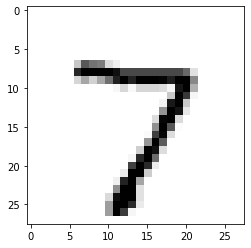

In [4]:
import torchvision

dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=None)
image, _ = dataset[0]
plt.imshow(np.array(image), cmap='Greys')
plt.show()

<a id="iaaemboss"></a>
# IAAEmboss

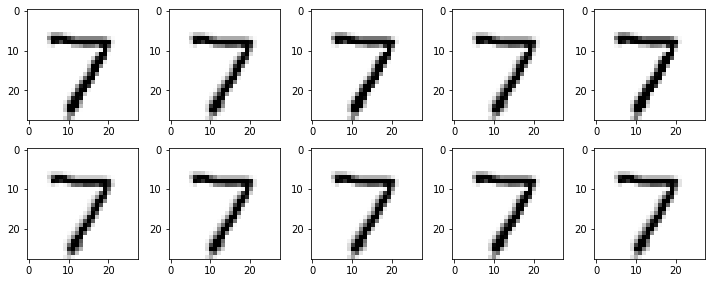

In [5]:
transform = A.Compose([
    A.IAAEmboss(alpha=(0.2, 0.5), strength=(0.2, 0.7), p=1.0),
])

transform_plot(image, transform)

<a id="iaasuperpixels"></a>
# IAASuperpixels

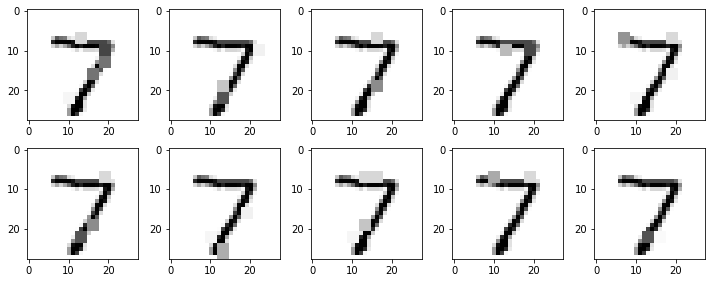

In [6]:
transform = A.Compose([
    A.IAASuperpixels(p_replace=0.1, n_segments=100, p=1.0),
])

transform_plot(image, transform)

<a id="iaasharpen"></a>
# IAASharpen

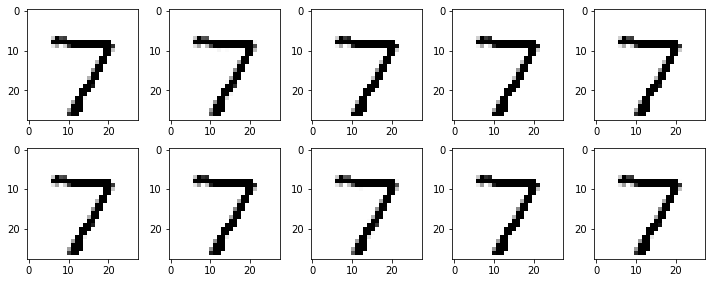

In [7]:
transform = A.Compose([
    A.IAASharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=1.0),
])

transform_plot(image, transform)

<a id="iaaadditivegaussiannoise"></a>
# IAAAdditiveGaussianNoise

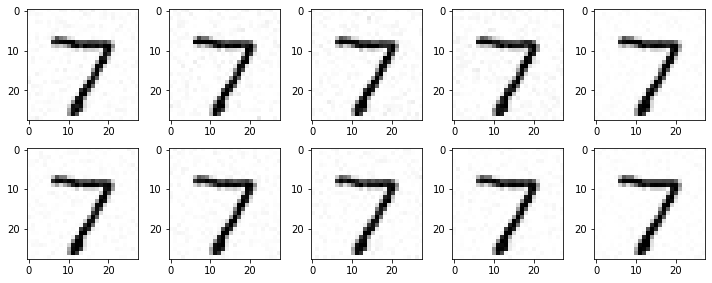

In [8]:
transform = A.Compose([
    A.IAAAdditiveGaussianNoise(loc=0, scale=(2.5500000000000003, 12.75), per_channel=False, p=1.0),
])

transform_plot(image, transform)

<a id="iaaaffine"></a>
# IAAAffine

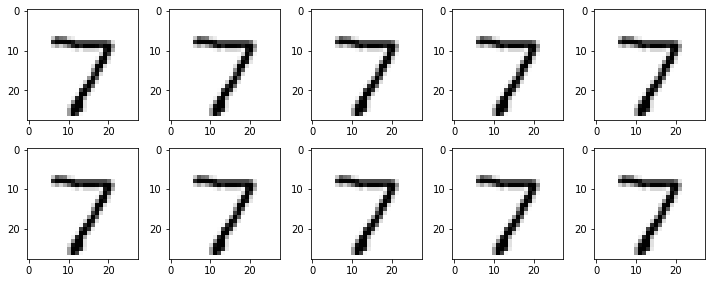

In [9]:
transform = A.Compose([
    A.IAAAffine(scale=1.0, translate_percent=None, translate_px=None, rotate=0.0, shear=0.0, order=1, cval=0, mode='reflect', p=1.0),
])

transform_plot(image, transform)

<a id="iaapiecewiseaffine"></a>
# IAAPiecewiseAffine

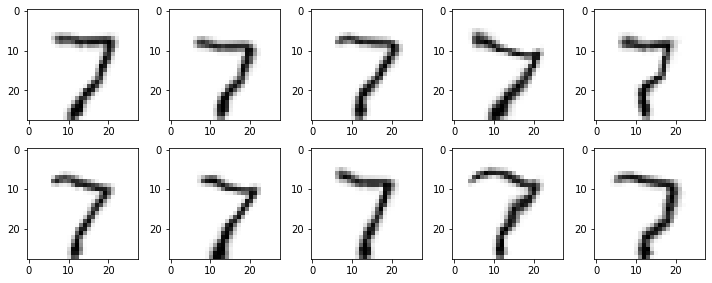

In [10]:
transform = A.Compose([
    A.IAAPiecewiseAffine(scale=(0.03, 0.05), nb_rows=4, nb_cols=4, order=1, cval=0, mode='constant', p=1.0),
])

transform_plot(image, transform)

<a id="iaaperspective"></a>
# IAAPerspective

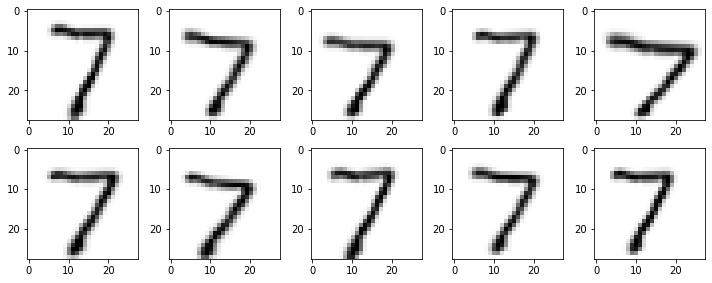

In [11]:
transform = A.Compose([
    A.IAAPerspective(scale=(0.05, 0.1), keep_size=True, p=1.0),
])

transform_plot(image, transform)